In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import seaborn as sns

In [47]:
df = pd.read_csv("10lkh.csv")

In [48]:
df

,datetime,close
0,2010-01-03 18:02:00,938.75
1,2010-01-03 18:03:00,939.25
2,2010-01-03 18:04:00,938.75
3,2010-01-03 18:05:00,939.00
4,2010-01-03 18:06:00,938.75
...,...,...
1048571,2013-01-02 18:33:00,1345.25
1048572,2013-01-02 18:34:00,1345.25
1048573,2013-01-02 18:35:00,1345.50
1048574,2013-01-02 18:36:00,1345.25


In [25]:
df2 = df.set_index('datetime')

In [40]:
df2

,close,logReturn,sqrd_return,abs_return
datetime,,,,
2010-01-03 18:02:00,938.75,NaN,NaN,NaN
2010-01-03 18:03:00,939.25,0.000532,2.835364e-07,0.000532
2010-01-03 18:04:00,938.75,-0.000532,2.835364e-07,0.000532
2010-01-03 18:05:00,939.00,0.000266,7.090298e-08,0.000266
2010-01-03 18:06:00,938.75,-0.000266,7.090298e-08,0.000266
...,...,...,...,...
2013-01-02 18:33:00,1345.25,0.000000,0.000000e+00,0.000000
2013-01-02 18:34:00,1345.25,0.000000,0.000000e+00,0.000000
2013-01-02 18:35:00,1345.50,0.000186,3.452974e-08,0.000186


In [9]:
df2['logReturn'] = np.log(df2.close/df2.close.shift(1))

In [10]:
df2['sqrd_return'] = df2['logReturn']**2

In [11]:
df2['abs_return'] = df2['logReturn'].abs()

In [23]:
dfp

,logReturn,sqrd_return,abs_return
close,,,
938.75,NaN,NaN,NaN
939.25,0.000532,2.835364e-07,0.000532
938.75,-0.000532,2.835364e-07,0.000532
939.00,0.000266,7.090298e-08,0.000266
938.75,-0.000266,7.090298e-08,0.000266
...,...,...,...
1345.25,0.000000,0.000000e+00,0.000000
1345.25,0.000000,0.000000e+00,0.000000
1345.50,0.000186,3.452974e-08,0.000186


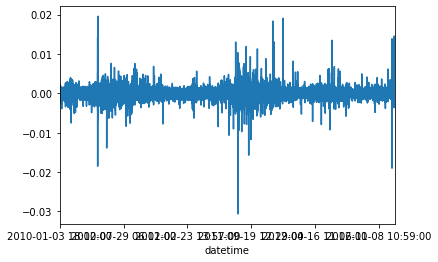

In [10]:
df2['logReturn'].plot()

In [11]:
def zscore(returns):
    return (returns-returns.mean())/np.std(returns)

In [12]:
normalized = zscore(df2.logReturn)

Text(0, 0.5, 'Normalized Returns')

C:\Users\TAN\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\TAN\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


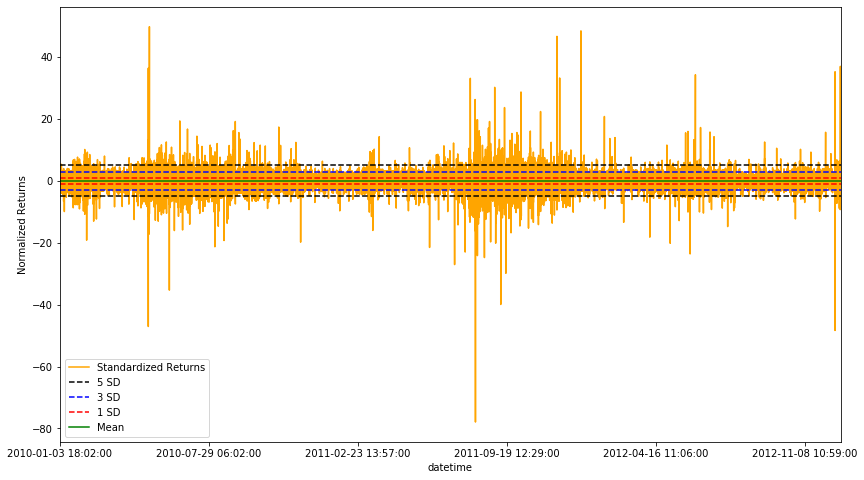

In [13]:
normalized.plot(figsize=(14,8),label='Standardized Returns',color='orange')
plt.axhline(normalized.std()*3,color='blue',ls='--')
plt.axhline(normalized.std()*5,color='black',ls='--')
plt.axhline(normalized.std()*-5,color='black',label='5 SD',ls='--')
plt.axhline(normalized.std()*-3,color='blue',label='3 SD',ls='--')
plt.axhline(normalized.std(),color='red',ls='--')
plt.axhline(normalized.std()*-1,color='red',ls='--',label='1 SD')
plt.axhline(normalized.mean(),color='green',label='Mean')
plt.legend()
plt.ylabel("Normalized Returns",size=10)

In [ ]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.close,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Prices")

In [ ]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.logReturn[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Log Returns")

In [ ]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.sqrd_return[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Squarred Log Returns")

In [ ]:
#df2.to_csv("HFT_65536_Futures.csv")

In [ ]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.abs_return[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Absolute Log Returns")

In [ ]:
s = pd.Series(df2['close'])

In [ ]:
s.autocorr(lag=1)

In [ ]:
s.autocorr(lag=2) 

In [ ]:
s.autocorr(lag=3) 

In [ ]:
s.autocorr(lag=4) 

In [ ]:
s.autocorr(lag=5)

In [ ]:
s = pd.Series(df2['logReturn'])

In [ ]:
s.autocorr(lag=1)

In [ ]:
s.autocorr(lag=2) 

In [ ]:
s.autocorr(lag=3) 

In [ ]:
s.autocorr(lag=4) 

In [ ]:
s.autocorr(lag=5)

In [ ]:
df2

In [ ]:
s = pd.Series(df2['sqrd_return'])

In [ ]:
s.autocorr(lag=1)

In [ ]:
s.autocorr(lag=2) 

In [ ]:
s.autocorr(lag=3) 

In [ ]:
s.autocorr(lag=4) 

In [ ]:
s.autocorr(lag=5)

In [ ]:
s = pd.Series(df2['abs_return'])

In [ ]:
s.autocorr(lag=1)

In [ ]:
s.autocorr(lag=2) 

In [ ]:
s.autocorr(lag=3) 

In [ ]:
s.autocorr(lag=4) 

In [ ]:
s.autocorr(lag=5)